<a href="https://colab.research.google.com/github/Rajeshprd/Avacado-model/blob/main/Avacado_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importing the basic libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##**Importing libraries for model building**

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

##**Importing the dataset**

In [25]:
avacado = pd.read_csv("/content/Avocado.csv")

##**Description of dataset**

In [4]:
avacado.shape

(18249, 14)

In [5]:
avacado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
avacado.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


##**Exploratory data analysis [EDA]**

In [7]:
avacado.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [8]:
avacado.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

##**Finding null values**

In [9]:
avacado.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

### Drop the column Unnamed: 0 and Date

In [27]:
avacado.drop(columns=['Unnamed: 0', "Date"],inplace=True)

In [28]:
avacado.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [29]:
avacado.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

# **Vizualisation**

##**searching for outliers**

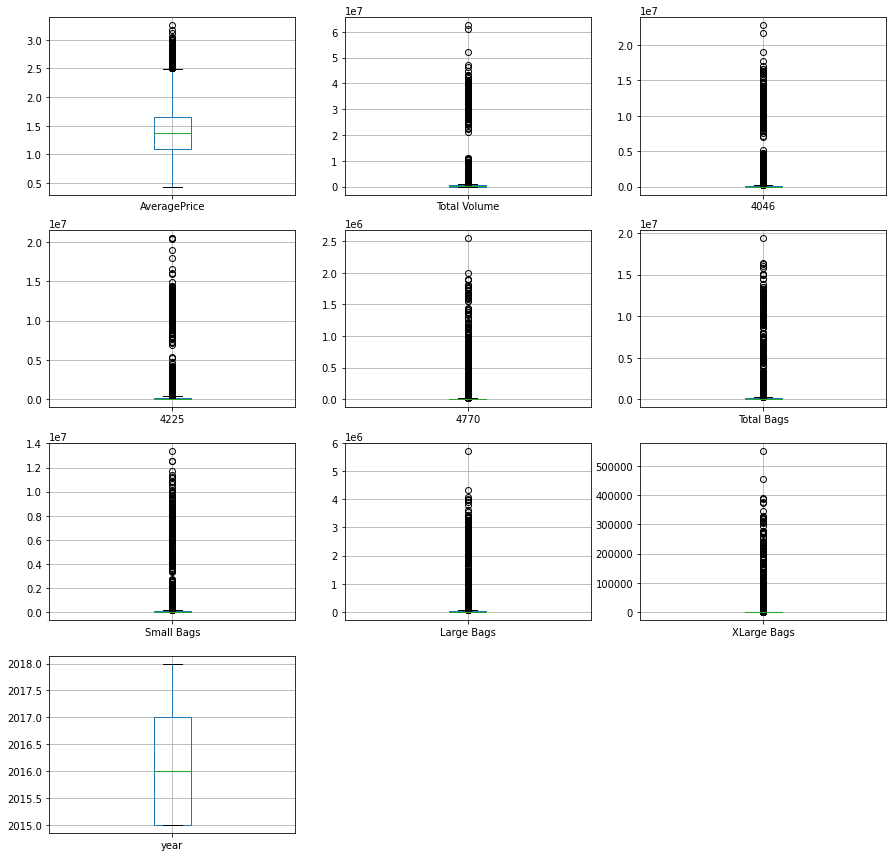

In [30]:
plt.figure(figsize=[15,15])
rows = 4
cols = len(avacado.columns)//rows
j=0
for i in avacado.columns:
    if (avacado[i].dtype != object):
        j+=1
        plt.subplot(rows,cols,j)
        avacado.boxplot(i)
plt.show()

###plotting to find price dependency on the region

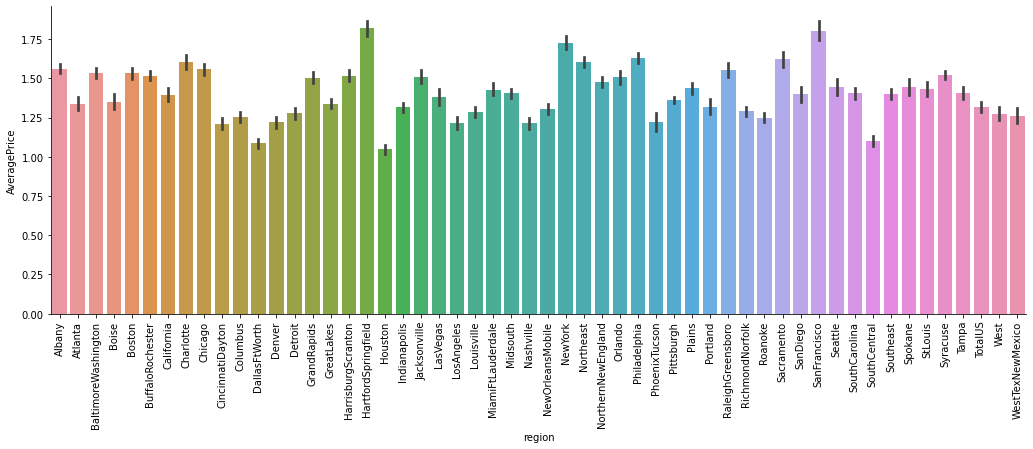

In [34]:
price_region =sns.catplot(x="region",y="AveragePrice",data=avacado,kind="bar",aspect=3)
price_region.set_xticklabels(rotation=90)

###from this bar plot we can see that the average price of avacado is less in houston region

##**Pairplot**

<Figure size 1080x1080 with 0 Axes>

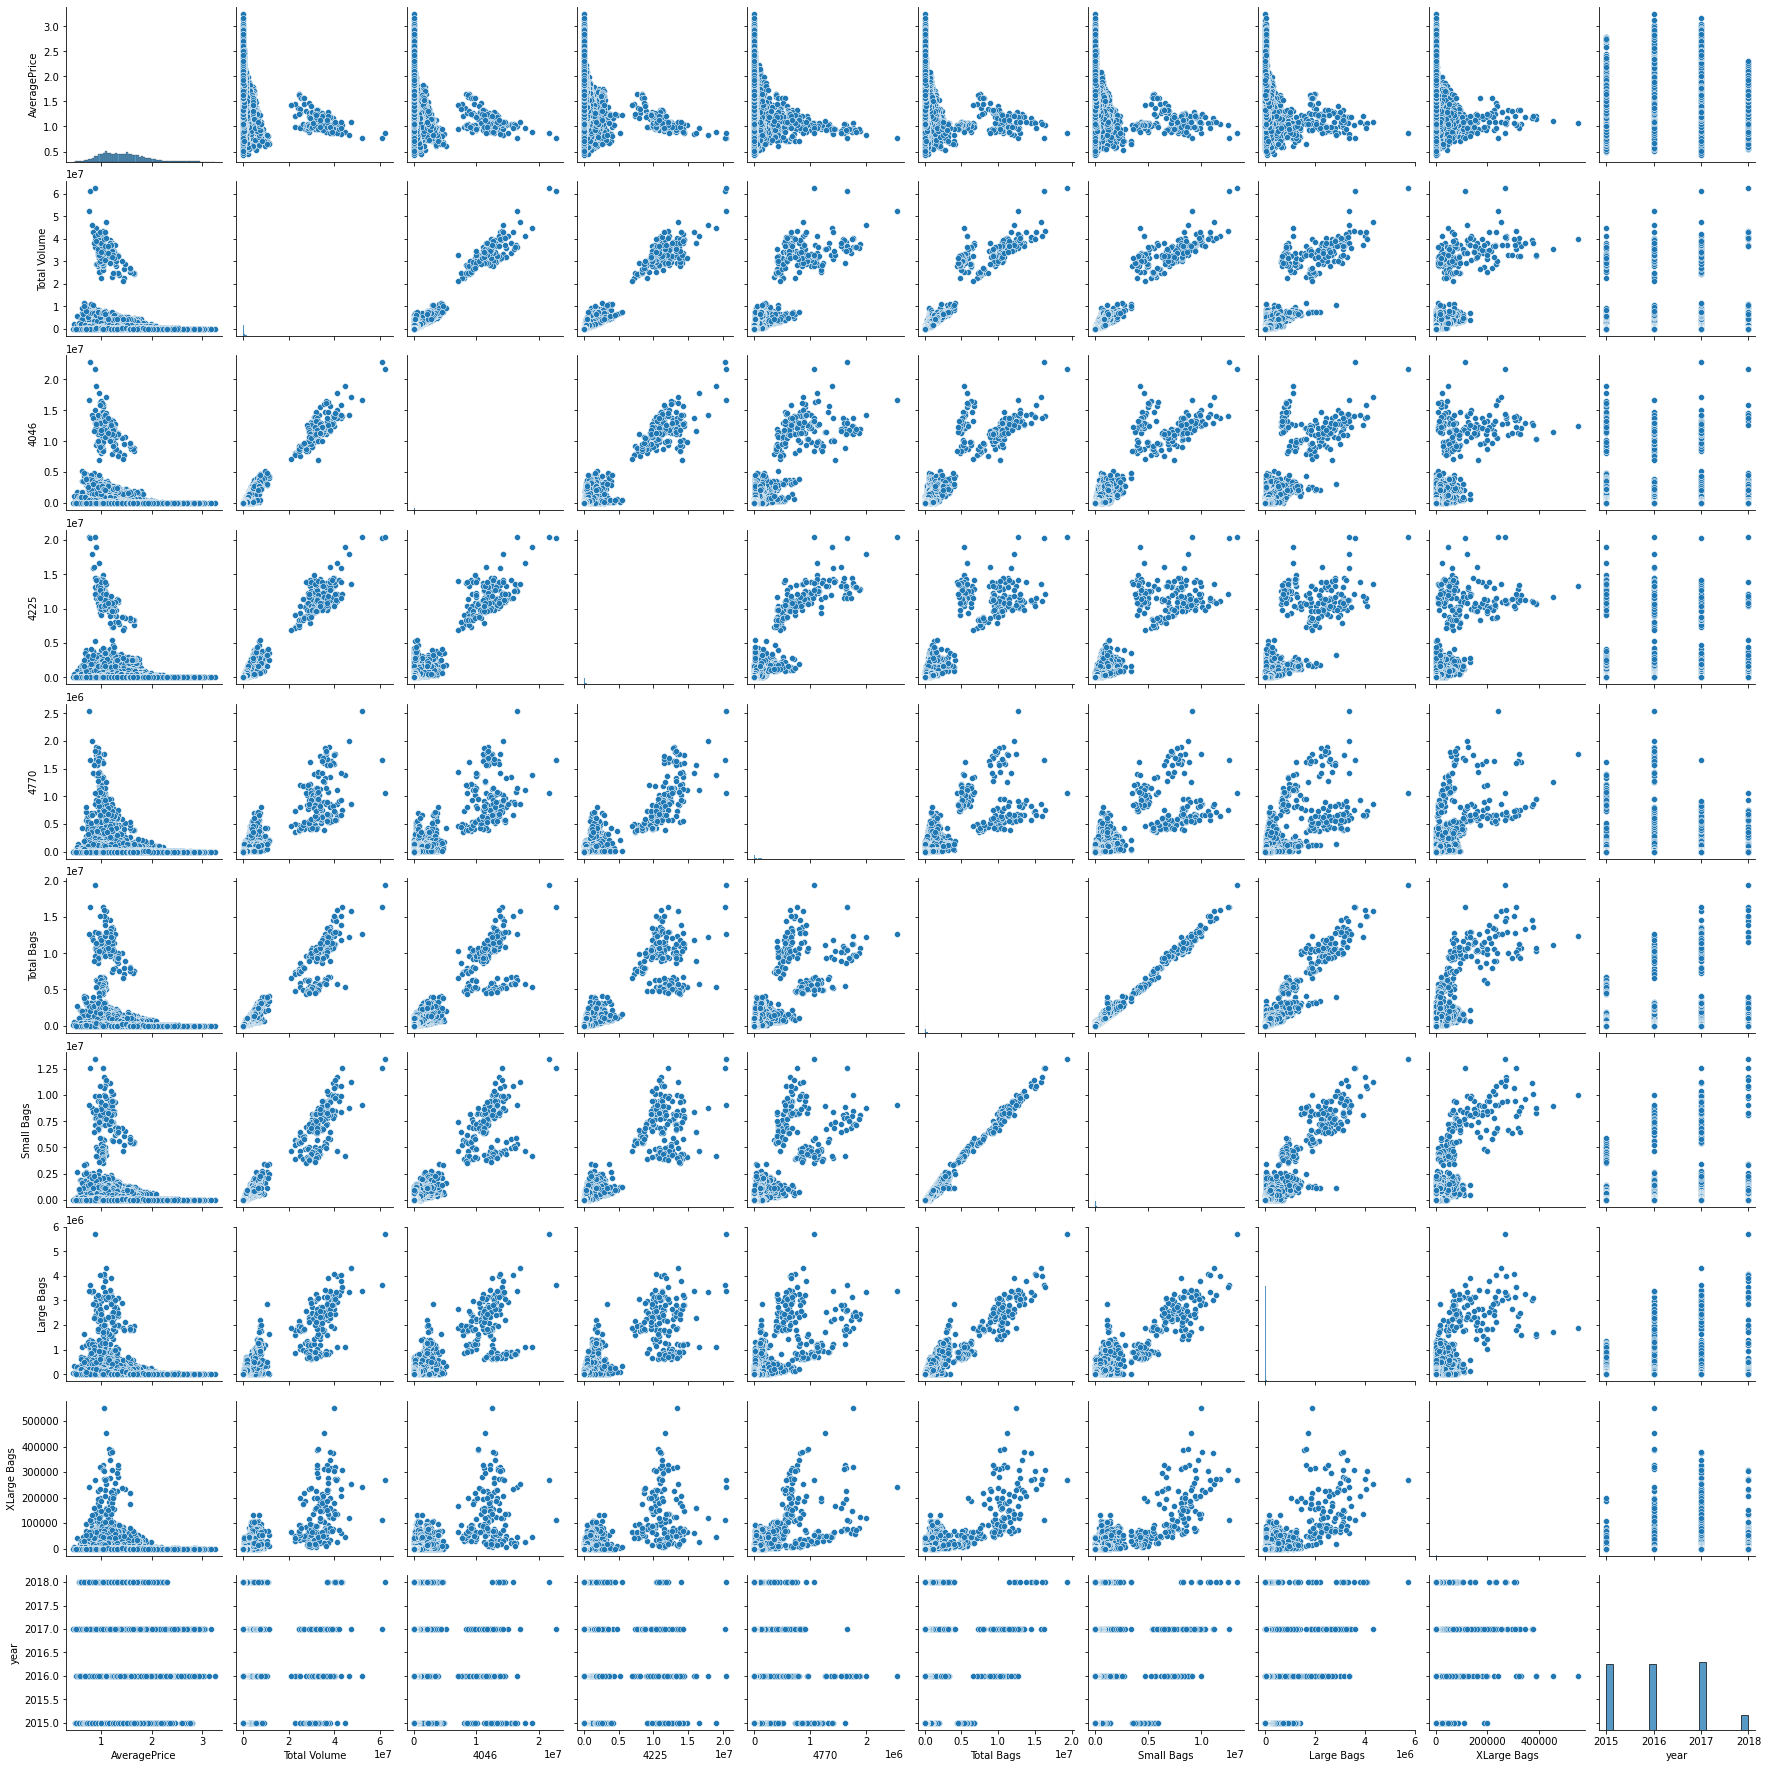

In [35]:
plt.figure(figsize=[15,15])
sns.pairplot(data=avacado)

##**Heatmap**

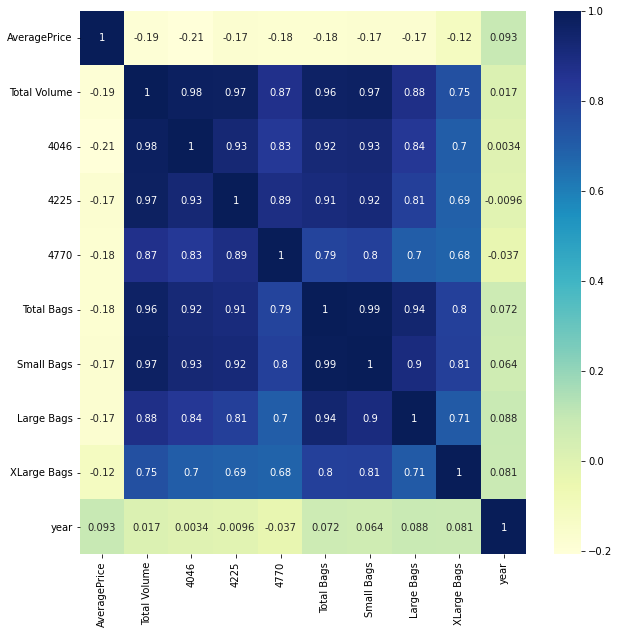

In [41]:
plt.figure(figsize=[10,10])
sns.heatmap(data=avacado.corr(),annot=True, cmap="YlGnBu")

###checking for unique values

In [42]:
avacado.type.unique()

array(['conventional', 'organic'], dtype=object)

In [43]:
avacado.year.unique()

array([2015, 2016, 2017, 2018])

##**Feature engineering**

###Label encoding the features

In [45]:
lb = LabelEncoder()
avacado.type = lb.fit_transform(avacado.type)
avacado

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,WestTexNewMexico


###**One-hot encoding**

In [46]:
avacado_dummy = pd.get_dummies(avacado,columns=["year","region"])
avacado_dummy.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year_2015,year_2016,year_2017,year_2018,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##**seperating independent features**

In [47]:
X = avacado_dummy.drop(columns="AveragePrice")
y = avacado_dummy.AveragePrice
print(X.head(),"\n\n", y.head())

   Total Volume     4046  ...  region_West  region_WestTexNewMexico
0      64236.62  1036.74  ...            0                        0
1      54876.98   674.28  ...            0                        0
2     118220.22   794.70  ...            0                        0
3      78992.15  1132.00  ...            0                        0
4      51039.60   941.48  ...            0                        0

[5 rows x 67 columns] 

 0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64


##**spliting the data**

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)
print("Shape of the data \n shape X_train: ",X_train.shape,"shape X_test:",X_test.shape)

Shape of the data 
 shape X_train:  (13686, 67) shape X_test: (4563, 67)


##**feature Normalization**

In [49]:
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

#**Model creation**

###polynomial features

In [50]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train_norm)
X_test_poly = poly.transform(X_test_norm)

### LinearRegression

In [51]:
reg_model = LinearRegression()
reg_model.fit(X_train_poly,y_train)

LinearRegression()

In [52]:
coeficient = reg_model.coef_
print("Coeficient of X: ",coeficient)

Coeficient of X:  [ 1.37304901e+05 -9.28033132e+08  3.38505391e+08 ...  9.09537745e+06
  5.08762120e+06  1.61400601e+07]


In [54]:
inter = reg_model.intercept_
print("intercept of Y : ",inter)

intercept of Y :  -533081997.4020173


###Predicting the unseen values

In [55]:
pred_y = reg_model.predict(X_test_poly)
print(f"\n predicted value: \n {pred_y} \n true y:\n {y_test}")


 predicted value: 
 [0.81998718 1.04167092 1.46343428 ... 1.65424871 1.33214921 1.57270694] 
 true y:
 8604     0.82
2608     0.97
14581    1.44
4254     0.97
16588    1.45
         ... 
3763     0.90
79       0.99
13798    1.68
4506     1.21
10399    1.88
Name: AveragePrice, Length: 4563, dtype: float64


#**Evaluating the model**

###model score

In [57]:
R2error = reg_model.score(X_test_poly,y_test)
print("model score: ", R2error)

model score:  -1212.0228633767806


###Root mean square error

In [58]:
RMSE = mean_squared_error(y_test,pred_y,squared=False)
print("Root mean square error of the model: ",RMSE)

Root mean square error of the model:  13.987823369509046


###mean Square error

In [59]:
MSE = mean_squared_error(y_test,pred_y)
print("Mean square error of the model: ",MSE)

Mean square error of the model:  195.6592026165834


###Mean Absolute error

In [60]:
MAE = mean_absolute_error(y_test,pred_y)
print("Mean absolute error of the model: ",MAE)

Mean absolute error of the model:  0.786961553653238
